In [1]:
#The marks awarded for an assignment set for a Year 8 class of 20 students were as
#follows:
x=[6, 7, 5, 7 ,7 ,8, 7, 6, 9 ,7 ,4 ,10, 6 ,8 ,8 ,9 ,5 ,6, 4 ,8]

In [2]:

import numpy as np
from scipy import stats
import sympy as smp
from scipy.integrate import quad

In [3]:
x

[6, 7, 5, 7, 7, 8, 7, 6, 9, 7, 4, 10, 6, 8, 8, 9, 5, 6, 4, 8]

In [4]:
print("Mean : ",np.mean(x))
print("Median : ",np.median(x))
print("Mode : ",stats.mode(x))
print("Standard Deviation : ",np.std(x))

Mean :  6.85
Median :  7.0
Mode :  ModeResult(mode=array([7]), count=array([5]))
Standard Deviation :  1.5898113095584647


In [5]:
#The number of calls from motorists per day for roadside service was recorded for a
#particular month:
y=[28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170, 100, 75, 104, 97, 75, 123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109]

In [6]:
print("Mean : ",np.mean(y))
print("Median : ",np.median(y))
print("Mode : ",stats.mode(y))
print("Standard Deviation : ",np.std(y))

Mean :  107.51428571428572
Median :  100.0
Mode :  ModeResult(mode=array([75]), count=array([4]))
Standard Deviation :  38.77287080168403


In [7]:

#The number of times I go to the gym in weekdays, are given below along with its associated probability:
xy= [0, 1, 2, 3, 4, 5]
data= [0.09, 0.15, 0.40, 0.25, 0.10, 0.01]
#Calculate the mean no. of workouts in a week. Also evaluate the variance involved in it.

In [8]:
print("Mean : ",np.mean(xy))
print("Variance: ",np.var(data))

Mean :  2.5
Variance:  0.016088888888888892


In [9]:
#Problem Statement 4:
#Let the continuous random variable D denote the diameter of the hole drilled in an aluminum sheet. The target diameter to be achieved is 12.5mm. Random disturbances in the process often result in inaccuracy.
#Historical data shows that the distribution of D can be modelled by the PDF (d) = 20e−20(d−12.5), d ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped, what is the proportion of those parts? What is the CDF when the diameter is of 11
#mm? What is your conclusion regarding the proportion of scraps?

In [11]:
from scipy import integrate

In [12]:
#PDF (𝑑) = 20𝑒−20(𝑑−12.5)
#𝑑 ≥ 12.5
PDF=lambda d:20*(np.exp((-20*(d-12.5))))
x = 12.6
P_x=integrate.quad(PDF,12.6,np.inf)
y = 11
CDF=integrate.quad(PDF,-np.inf,y)
print(f"Proportion of Parts need to scrapped when d >12.6mm is :{P_x[0]}")
print(f"CDF when d= 11mm is:{CDF[0]}")
print(f"Proportion of CDF when d>12.5mm is : {integrate.quad(PDF,12.5,np.inf)[0]}")


Proportion of Parts need to scrapped when d >12.6mm is :0.13533528323661398
CDF when d= 11mm is:inf
Proportion of CDF when d>12.5mm is : 1.0000000000000024


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
##A company manufactures LED bulbs with a faulty rate of 30%. If I randomly select 6 chosen LEDs, what is the probability of having 2 faulty LEDs in my sample? Calculate the average value of this process. Also evaluate the standard deviation associated with it.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import scipy.special

a      2.000000
B_a    0.324135
Name: 2, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Probability of Fault')

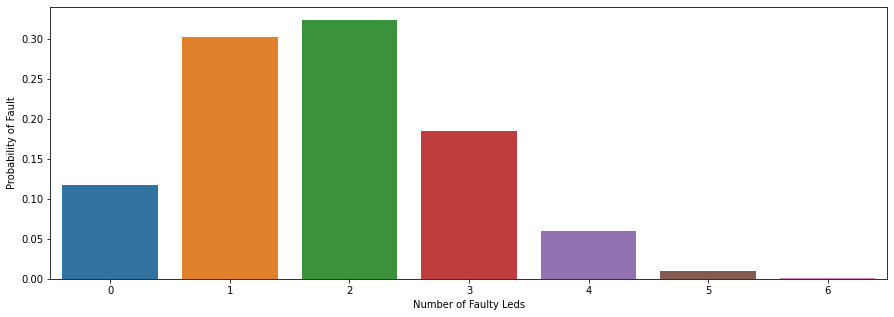

In [15]:
#x = faulty = 0.3
#y = non faulty = 0.7
x = 0.3
y = 0.7
df=pd.DataFrame({'a':[int(i) for i in range(7)],
                 'B_a':[scipy.special.comb(6,i)*(x**i)*(y**(6-i)) for i in range(7)]})
print(df.iloc[2])
plt.figure(figsize=(15,5))
sns.barplot('a','B_a',data=df)
plt.xlabel('Number of Faulty Leds')
plt.ylabel('Probability of Fault')

In [16]:
df['Expected value']=df['a']*df['B_a']
mean=np.round(df['Expected value'].sum())
print('mean = {}'.format(mean))
df['variance']=df['B_a']*(df['a']-mean)**2
std=np.sqrt(df['variance'].sum())
print(f"Standard Deviation : {np.round(std)}")

mean = 2.0
Standard Deviation : 1.0


In [17]:
#Gaurav and Barakha are both preparing for entrance exams. Gaurav attempts to solve 8 questions per day with a correction rate of 75%, while Barakha averages around 12 questions per day with a correction rate of 45%. What is the probability that each of them will solve 5 questions correctly? What happens in cases of 4 and 6 correct solutions? What do you infer from it? What are the two main governing factors affecting their ability to solve questions correctly? Give a pictorial representation of the same to validate your answer.

In [18]:
#Gaurav- avg=,p1=0.75
#Barakha- avg=5,p2=0.45
#here both the students are independent from each other, correction rate of one doesnot effect another one 
#G(5)*B(5)

from scipy.stats import binom
import numpy as np

print(f"Probability of each of them solving 5 questions correctly is:{binom.pmf(5,8,0.75)*binom.pmf(5,12,0.45)}")
print(f"Probability of each of them solving 4,6 questions correctly is:{binom.pmf(4,8,0.75)*binom.pmf(6,12,0.45)}")
#their correction rates effect their combined probability

Probability of each of them solving 5 questions correctly is:0.04619989057299217
Probability of each of them solving 4,6 questions correctly is:0.018374956477894583


In [19]:
#following graphs show their correction rates invidually and combined
def binom_plot(n,p,):
    fig,ax=plt.subplots(1,1)
    x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
    ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
    ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

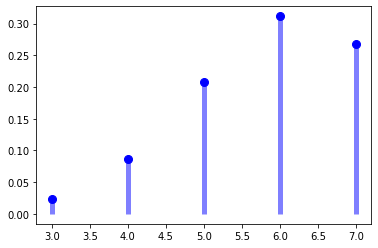

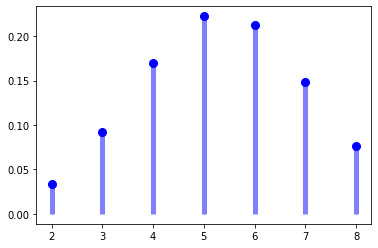

In [20]:
#Gaurav
binom_plot(8,0.75)
#Barakha
binom_plot(12,0.45)

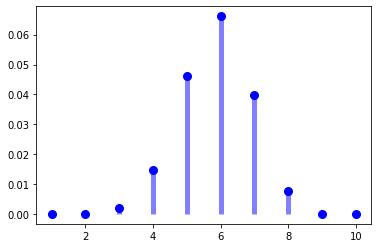

In [21]:
fig,ax=plt.subplots(1,1)
x = np.arange(1,11)
ax.plot(x, binom.pmf(x,8,0.75)*binom.pmf(x,12,0.45), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x,8,0.75)*binom.pmf(x,12,0.45), colors='b', lw=5, alpha=0.5)
#maximum combined probability observed at 6 question

In [22]:
from scipy.stats import binom
binom.pmf(5,8,0.75)*binom.pmf(5,12,0.45)

0.04619989057299217

In [23]:
#Customers arrive at a rate of 72 per hour to my shop. What is the probability of 𝑘 customers arriving in 4 minutes? a) 5 customers, b) not more than 3 customers, c) more than 3 customers. Give a pictorial representation of the same to validate your answer.

In [24]:
from scipy.stats import poisson
#We need to calculate average number of customers arriving per 4 minutes
#72/60 customers come per minute
mu = 4*(72/60) #customers come per 4 minutes
print(f"The probability of arriving 5 cutomers in 4 minutes is : {poisson.pmf(k=5,mu=mu)}")
print(f"The probability of arriving not more than 3 customers in 4 minutes is : {poisson.pmf(k=3, mu=mu)}")
print(f'The Probability of more than 3 customers arriving in 4 minutes is : {1-poisson.cdf(k=3,mu=mu)}')

The probability of arriving 5 cutomers in 4 minutes is : 0.17474768364388296
The probability of arriving not more than 3 customers in 4 minutes is : 0.15169069760753714
The Probability of more than 3 customers arriving in 4 minutes is : 0.7057700835034357


Text(0, 0.5, 'Probability')

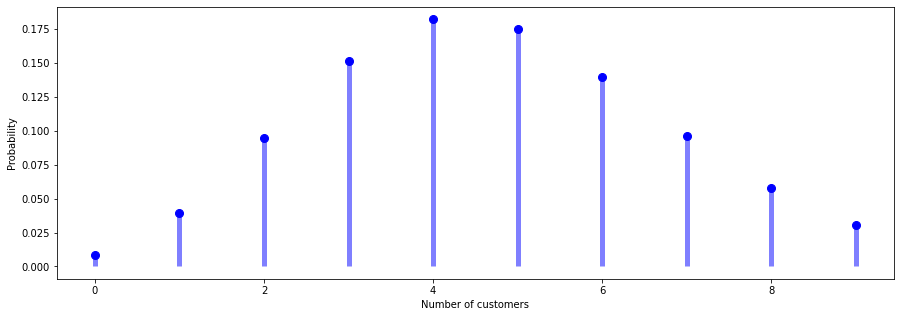

In [25]:
x = list(range(0,10))
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x, poisson.pmf(x,mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.xlabel('Number of customers')
plt.ylabel('Probability')

In [26]:
#I work as a data analyst in Aeon Learning Pvt. Ltd. After analyzing data, I make reports, where I have the efficiency of entering 77 words per minute with 6 errors per hour. What is the probability that I will commit 2 errors in a 455-word financial report? What happens when the no. of words increases/decreases (in case of 1000 words, 255 words)?
#How is the 𝜆 affected?
#How does it influence the PMF?
#Give a pictorial representation of the same to validate your answer.

The pobability of commiting 2 errors in 455 words financial report is :0.09669027375144444
The pobability of commiting 2 errors in 1000 words financial report is :0.23012815007300153
The pobability of commiting 2 errors in 255 words financial report is :0.039377135392854104


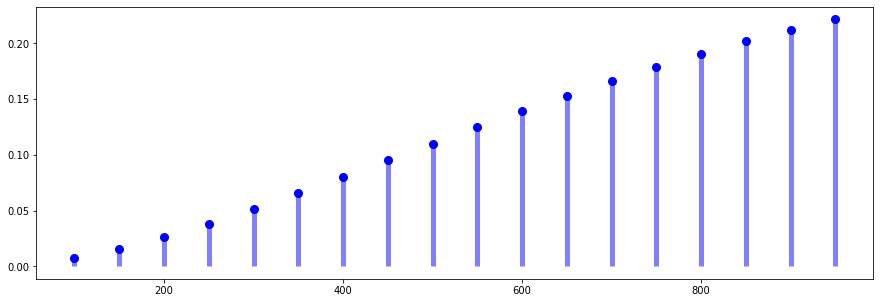

In [27]:
from scipy.stats import poisson
#Rate of entering=77 per minute
#error rate= 6/hour=0.1 per minute
#No of errors per word=0.1/77
unit_mu=0.1/77
def mu(n):
    return n * unit_mu
print(f"The pobability of commiting 2 errors in 455 words financial report is :{poisson.pmf(2,mu=mu(455))}")
print(f"The pobability of commiting 2 errors in 1000 words financial report is :{poisson.pmf(2,mu=mu(1000))}")
print(f"The pobability of commiting 2 errors in 255 words financial report is :{poisson.pmf(2,mu=mu(255))}")
x=range(100,1000,50)
mu=[i*unit_mu for i in x]
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,poisson.pmf(2,mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0, poisson.pmf(2,mu), colors='b', lw=5, alpha=0.5)
#As the number of words increase probability of getting errors increases    

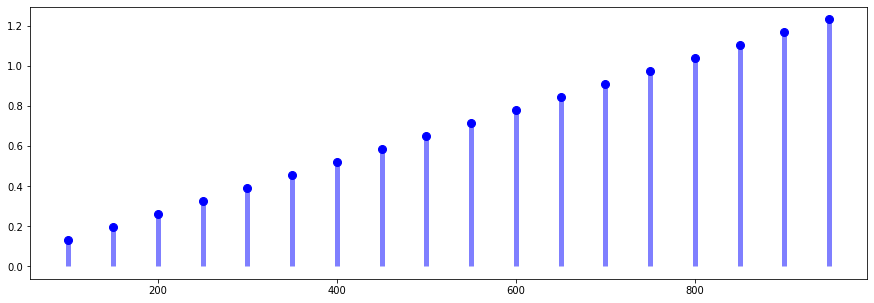

In [28]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,mu, 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0,mu, colors='b', lw=5, alpha=0.5)
#Value of mu keeps on increasing with number of words

In [29]:
#Please compute the following:
#a) P(Z > 1.26), . P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6)
#b) Find the value 𝑧 such that 𝑃(𝑍 > 𝑧) = 0.05
#c) Find the value of 𝑧 such that 𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99

In [30]:
from scipy.stats import norm
def P(z,b=-np.inf) :
    return integrate.quad(norm.pdf,b,z)[0]

print('P(Z>1.26) = %.5f'%(1-P(1.26)))
print('P(Z<-0.86) = %.5f'%P(-0.86))
print('P(Z>-1.37) = %.5f'%(1-P(-1.37)))
print('P(−1.25 < Z < 0.37) = %.5f'%P(0.37,b=-1.25))
print('P(Z ≤ −4.6) = %.5f'%P(-4.6))

P(Z>1.26) = 0.10383
P(Z<-0.86) = 0.19489
P(Z>-1.37) = 0.91466
P(−1.25 < Z < 0.37) = 0.53866
P(Z ≤ −4.6) = 0.00000


In [31]:
print('P(Z>z)=0.05 is %.2f'%(-1*norm.ppf(0.05)))
print('𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is %.2f'%(abs(norm.ppf(0.005))))

P(Z>z)=0.05 is 1.64
𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is 2.58


In [32]:
#The current flow in a copper wire follow a normal distribution with a mean of 10 𝑚A and a variance of 4 (𝑚𝐴)2.
#What is the probability that a current measurement will exceed 13 𝑚𝐴? What is the probability that a current measurement is between 9 and 11mA? Determine the current measurement which has a probability of 0.98.

In [33]:
mean = 10
std = np.sqrt(4)

def I(z, b=-np.inf):
    z = (z-mean)/std
    return integrate.quad(norm.pdf,b,z)[0]
print(f"Probability that current > 13mA is: {1-I(13)}")
print(f"Probability that current is between 9 mA and 11 mA is : {1-I(11,b=9)}")

Probability that current > 13mA is: 0.06680720126885797
Probability that current is between 9 mA and 11 mA is : 1.3085375387259144


In [34]:
#The shaft in a piston has its diameter normally distributed with a mean of 0.2508 inch and a standard deviation of 0.0005 inch. The specifications of the shaft are 0.2500 ∓0.0015 inch. What proportion of shafts are in sync with the specifications? If the process is centered so that the mean is equal to the target value of 0.2500, what proportion of shafts conform to the new specifications? What is your conclusion from this experiment?

In [35]:
mean_dia=0.2508
std_dia=0.0005
#specified dia in the range of 0.2485<d<0.2515
#case-1 if mean_dia=0.2508
def I(mean,std,a,b) :
  #gives P(Z<=x)
  a=(a-mean)/std
  b=(b-mean)/std
print(f"Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:{0.2508,I(0.2508,0.0005,0.2485,0.2515)}")
print(f"Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:{0.2500,I(0.2500,0.0005,0.2485,0.2515)}")

Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:(0.2508, None)
Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:(0.25, None)


In [36]:
#Within the range of 0.2485<d<0.2515 A manufacturing process with mean of 0.25 gives maximum proportion of required shafts, there by reducing amount of scrap and reprocessing time.
#When compared to any other manufacturing process whose mean deviates from that of 0.25 less proportion of required shafts are obtained. The more the manufucaturing process deviaties from 0.25, lesser will be the proportion of reqired safts obtained.
#Mathematically, in a given range 0.2485<d<0.2515 , if there are two noraml distributrions (manufacturing processes) with same standard deviation,more area will be covered by the distribution whose mean is closer to mean of the interval i.e 0.25